In [73]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [74]:
# Downsize, grayscale, and flatten images

def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [75]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column 
    processed['class'] = folder.parts[-1]
    
    return processed

In [76]:
# Training set
train_healthy = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/healthy'))
print("train_healthy: Done")
train_multipe = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/multiple_disease'))
print("train_multipe: Done")
train_rust = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/rust'))
print("train_rust: Done")
train_scab = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab'))
print("train_scab: Done")
train_set = pd.concat([train_healthy, train_multipe,train_rust, train_scab], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

print("Train Set Done")

# Test set
test_set = process_folder(folder=pathlib.Path.cwd().joinpath('/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/test'))
test_set = pd.concat([test_set], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)

print("test Set done")

train_healthy: Done
train_multipe: Done
train_rust: Done
train_scab: Done
Train Set done
test Set done


In [77]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.972549,0.996078,0.933333,0.933333,0.972549,0.956863,0.894118,0.886275,0.949020,0.960784,...,0.807843,0.843137,1.000000,0.945098,0.752941,0.996078,1.000000,1.000000,0.992157,healthy
1,0.305882,0.301961,0.286275,0.266667,0.247059,0.266667,0.392157,0.537255,0.564706,0.466667,...,0.282353,0.282353,0.278431,0.274510,0.298039,0.317647,0.333333,0.341176,0.345098,healthy
2,0.407843,0.392157,0.388235,0.388235,0.376471,0.380392,0.392157,0.376471,0.329412,0.337255,...,0.415686,0.392157,0.384314,0.372549,0.372549,0.360784,0.349020,0.341176,0.333333,healthy
3,0.188235,0.223529,0.250980,0.262745,0.262745,0.254902,0.258824,0.247059,0.235294,0.239216,...,0.611765,0.717647,0.403922,0.207843,0.113725,0.117647,0.172549,0.200000,0.160784,healthy
4,0.270588,0.329412,0.396078,0.419608,0.384314,0.325490,0.321569,0.325490,0.333333,0.349020,...,0.513725,0.513725,0.509804,0.490196,0.490196,0.482353,0.490196,0.486275,0.494118,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0.968627,0.988235,0.984314,0.980392,0.980392,0.972549,0.952941,0.921569,0.925490,0.933333,...,0.239216,0.243137,0.243137,0.254902,0.294118,0.341176,0.400000,0.447059,0.486275,scab
588,0.301961,0.298039,0.313725,0.329412,0.298039,0.274510,0.274510,0.274510,0.282353,0.270588,...,0.290196,0.345098,0.470588,0.556863,0.572549,0.619608,0.631373,0.600000,0.584314,scab
589,0.282353,0.286275,0.290196,0.305882,0.317647,0.309804,0.298039,0.294118,0.294118,0.290196,...,0.439216,0.443137,0.474510,0.525490,0.549020,0.560784,0.580392,0.603922,0.619608,scab
590,0.521569,0.501961,0.623529,0.752941,0.788235,0.792157,0.819608,0.839216,0.807843,0.780392,...,0.501961,0.474510,0.407843,0.325490,0.427451,0.419608,0.345098,0.349020,0.360784,scab


In [78]:
# shuffle classes

train_set = shuffle(train_set).reset_index(drop=True)
test_set = shuffle(test_set).reset_index(drop=True)

In [79]:
test_set
train_set

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.345098,0.368627,0.439216,0.396078,0.384314,0.376471,0.388235,0.360784,0.360784,0.341176,...,0.207843,0.341176,0.407843,0.525490,0.294118,0.439216,0.694118,0.345098,0.584314,healthy
1,0.549020,0.545098,0.509804,0.501961,0.490196,0.466667,0.443137,0.458824,0.470588,0.450980,...,0.513725,0.494118,0.482353,0.474510,0.478431,0.498039,0.509804,0.529412,0.541176,scab
2,0.207843,0.254902,0.278431,0.286275,0.309804,0.309804,0.368627,0.415686,0.427451,0.400000,...,0.247059,0.294118,0.266667,0.254902,0.282353,0.278431,0.274510,0.262745,0.247059,rust
3,0.874510,0.894118,0.909804,0.929412,0.949020,0.956863,0.964706,0.972549,0.972549,0.976471,...,0.286275,0.317647,0.360784,0.384314,0.356863,0.294118,0.278431,0.305882,0.301961,scab
4,0.149020,0.156863,0.192157,0.164706,0.141176,0.227451,0.254902,0.309804,0.329412,0.298039,...,0.819608,0.847059,0.850980,0.839216,0.815686,0.745098,0.627451,0.580392,0.631373,rust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.278431,0.427451,0.278431,0.290196,0.317647,0.317647,0.337255,0.329412,0.360784,0.325490,...,0.266667,0.258824,0.250980,0.250980,0.247059,0.254902,0.266667,0.270588,0.262745,scab
1817,0.301961,0.258824,0.215686,0.196078,0.235294,0.423529,0.482353,0.290196,0.239216,0.250980,...,0.407843,0.313725,0.231373,0.243137,0.262745,0.235294,0.207843,0.196078,0.192157,rust
1818,0.164706,0.176471,0.192157,0.211765,0.235294,0.247059,0.266667,0.282353,0.396078,0.474510,...,0.376471,0.352941,0.352941,0.352941,0.341176,0.329412,0.305882,0.286275,0.294118,healthy
1819,0.521569,0.521569,0.509804,0.564706,0.647059,0.549020,0.545098,0.643137,0.572549,0.188235,...,0.666667,0.576471,0.235294,0.227451,0.258824,0.584314,0.949020,0.890196,0.839216,rust


In [80]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
# X_valid = valid_set.drop('class', axis=1)
# y_valid = valid_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [81]:
print("X_Train: ")  
print(X_train.shape)
print("X_Valid: ")  
print(X_valid.shape)
print("X_Test: ")  
print(X_test.shape)


X_Train: 
(1456, 9216)
X_Valid: 
(365, 9216)
X_Test: 
(1821, 9216)


In [82]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=4)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=1)

In [83]:
X_train


,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
65,0.549020,0.603922,0.623529,0.584314,0.498039,0.517647,0.576471,0.564706,0.517647,0.541176,...,0.400000,0.380392,0.317647,0.223529,0.239216,0.243137,0.235294,0.254902,0.274510,0.243137
29,0.415686,0.450980,0.482353,0.494118,0.486275,0.474510,0.505882,0.541176,0.560784,0.564706,...,0.568627,0.549020,0.525490,0.486275,0.431373,0.400000,0.384314,0.376471,0.356863,0.337255
1329,0.278431,0.286275,0.294118,0.286275,0.254902,0.235294,0.215686,0.203922,0.211765,0.235294,...,0.243137,0.243137,0.274510,0.341176,0.388235,0.423529,0.427451,0.419608,0.498039,0.533333
1312,0.388235,0.388235,0.376471,0.364706,0.352941,0.333333,0.305882,0.254902,0.235294,0.231373,...,0.258824,0.243137,0.239216,0.223529,0.215686,0.215686,0.211765,0.211765,0.203922,0.196078
1537,0.576471,0.556863,0.525490,0.525490,0.592157,0.666667,0.756863,0.827451,0.882353,0.901961,...,0.580392,0.666667,0.733333,0.764706,0.721569,0.494118,0.584314,0.709804,0.701961,0.650980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.478431,0.423529,0.352941,0.294118,0.258824,0.250980,0.250980,0.262745,0.270588,0.270588,...,0.231373,0.223529,0.298039,0.396078,0.266667,0.247059,0.231373,0.223529,0.239216,0.258824
709,0.196078,0.207843,0.207843,0.215686,0.223529,0.247059,0.266667,0.266667,0.266667,0.254902,...,0.149020,0.137255,0.137255,0.207843,0.352941,0.392157,0.396078,0.380392,0.466667,0.525490
439,0.447059,0.537255,0.615686,0.372549,0.156863,0.149020,0.164706,0.247059,0.258824,0.188235,...,0.180392,0.168627,0.160784,0.384314,0.584314,0.615686,0.600000,0.580392,0.584314,0.525490
174,0.352941,0.325490,0.333333,0.341176,0.352941,0.360784,0.356863,0.352941,0.360784,0.360784,...,0.521569,0.517647,0.521569,0.525490,0.529412,0.552941,0.576471,0.576471,0.564706,0.549020


In [84]:
# Train an image classification model with an Artificial neural network (ANN)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
12/12 [==============================] - 5s 325ms/step - loss: 7.4485 - accuracy: 0.3221 - val_loss: 2.6141 - val_accuracy: 0.0411
Epoch 2/30
12/12 [==============================] - 3s 285ms/step - loss: 1.4592 - accuracy: 0.3125 - val_loss: 1.6895 - val_accuracy: 0.3288
Epoch 3/30
12/12 [==============================] - 3s 276ms/step - loss: 1.3112 - accuracy: 0.3098 - val_loss: 1.7575 - val_accuracy: 0.0411
Epoch 4/30
12/12 [==============================] - 3s 269ms/step - loss: 1.2667 - accuracy: 0.3269 - val_loss: 1.9925 - val_accuracy: 0.0411
Epoch 5/30
12/12 [==============================] - 3s 275ms/step - loss: 1.2808 - accuracy: 0.3159 - val_loss: 1.6549 - val_accuracy: 0.3288
Epoch 6/30
12/12 [==============================] - 4s 296ms/step - loss: 1.2450 - accuracy: 0.3516 - val_loss: 1.6790 - val_accuracy: 0.3288
Epoch 7/30
12/12 [==============================] - 3s 274ms/step - loss: 1.2452 - accuracy: 0.3379 - val_loss: 1.6827 - val_accuracy: 0.2767
Epoch 

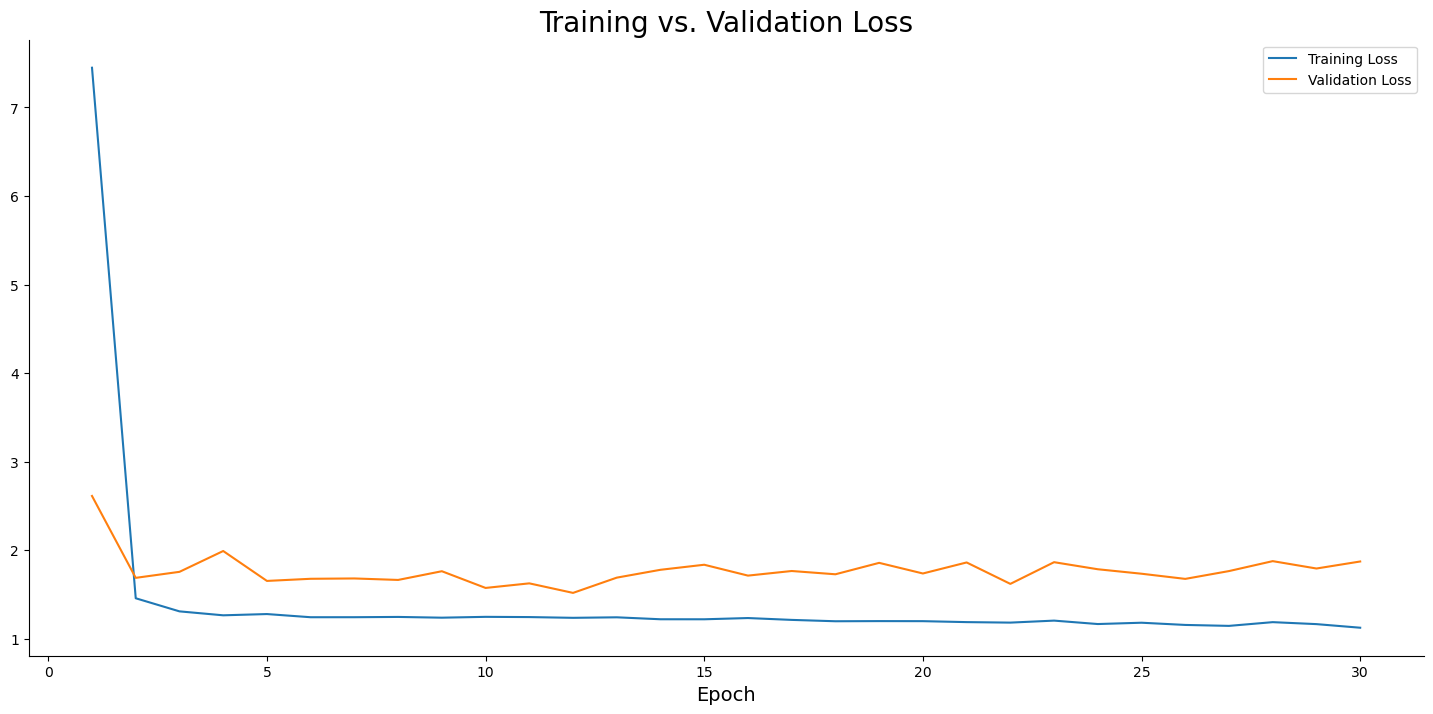

In [97]:
plt.plot(np.arange(1, 31), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 31), history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

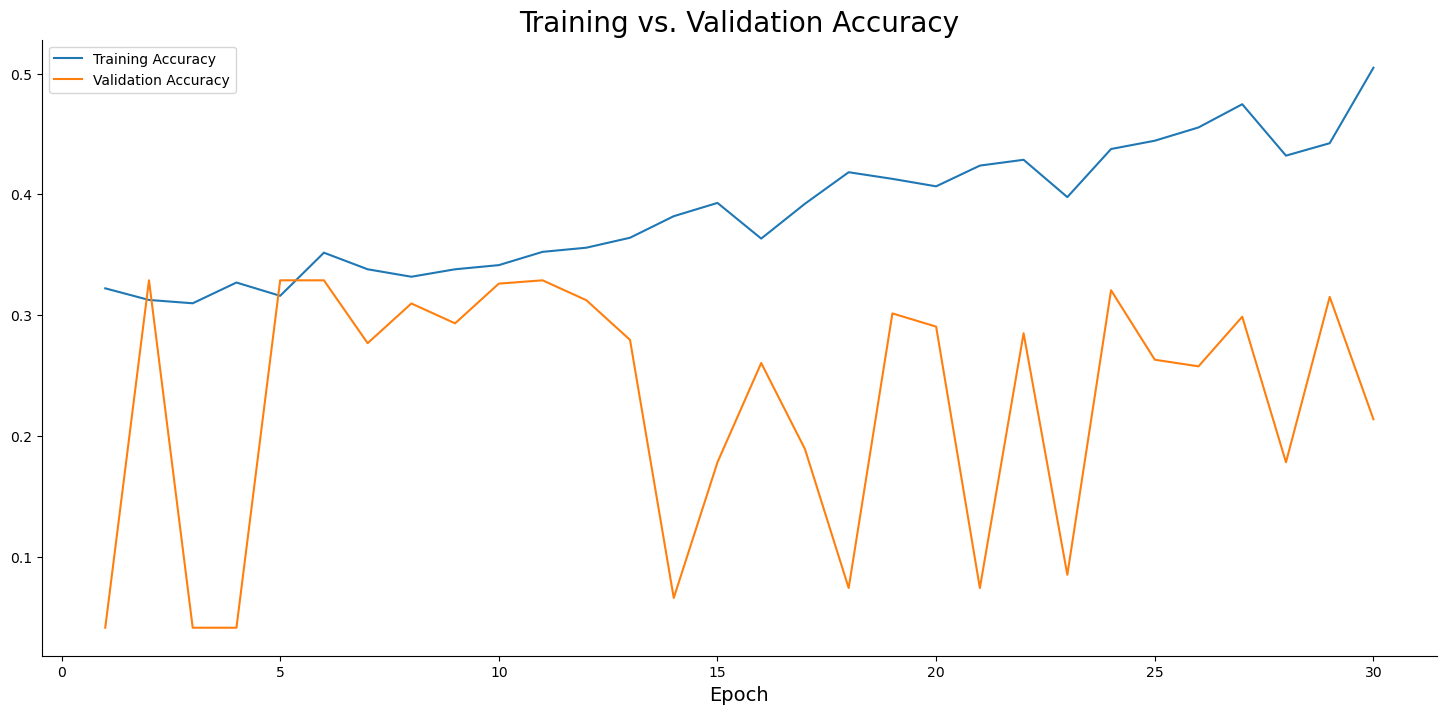

In [94]:
plt.plot(np.arange(1, 31), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 31), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();
